In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score

Compare the results from:
- Random forest
- Arima
- LSTM
- Benchmark

In [2]:
def loadData(path):
    data = pd.read_csv(path,index_col=0)
    data.index.rename('id', inplace=True)
    
    return data
    

def printSummary(data, name):
    print(f'{name}: mean MSE \t{data["mse"].mean()}\t std MSE {data["mse"].std()}\t mean r2 {data["r2"].mean()}\t correct {data["corr"].mean()}')

arima = loadData('results/arima.csv')
benchmark = loadData('results/benchmark.csv')
printSummary(benchmark, "Benchmark")
printSummary(arima, "ARIMA")

Benchmark: mean MSE 	0.5742871111928991	 std MSE 0.43081880035104153	 mean r2 -0.5626643851415392	 correct 0.5271254414692905
ARIMA: mean MSE 	0.2946283115341072	 std MSE 0.3010734346790197	 mean r2 -0.07497976166785703	 correct 0.7196049834938725


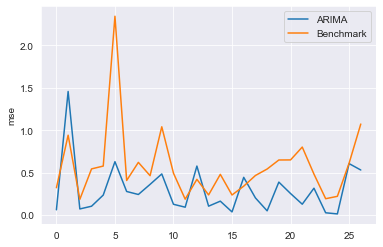

In [3]:
sns.set_style("darkgrid")

amt_persons = len(benchmark)
sns.lineplot(x=range(0, amt_persons), y= arima['mse'], label="ARIMA")
sns.lineplot(x=range(0, amt_persons), y= benchmark['mse'], label="Benchmark")
plt.savefig('figures/mse_line.png', dpi=300)

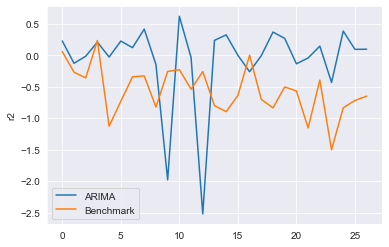

In [4]:
amt_persons = len(benchmark)
sns.lineplot(x=range(0, amt_persons), y= arima['r2'], label="ARIMA")
sns.lineplot(x=range(0, amt_persons), y= benchmark['r2'], label="Benchmark")
plt.savefig('figures/r2_line.png', dpi=300)

In [5]:
sns.distplot(arima['mse'], label="ARIMA", dpi=300)
sns.distplot(benchmark['mse'], label="Benchmark", dpi=300)

TypeError: distplot() got an unexpected keyword argument 'dpi'

In [ ]:
sns.distplot(arima['r2'], label="ARIMA")
sns.distplot(benchmark['r2'], label="Benchmark")